In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import warnings
warnings.filterwarnings('ignore')

In [2]:
# # colab 사용시
from google.colab import drive
drive.mount('/content/drive')
# !pip install matplotlib -U
# !sudo apt-get install -y fonts-nanum 
# !sudo fc-cache -fv 
# !rm ~/.cache/matplotlib -rf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/데이터분석

/content/drive/MyDrive/Colab Notebooks/데이터분석


In [4]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
# files = sorted(glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울시 공공자전거 이용정보(시간대별)\*.csv'))
files = sorted(glob.glob('.data/서울시 공공자전거 이용정보(시간대별)/*.csv'))
files

['.data/서울시 공공자전거 이용정보(시간대별)/서울특별시 공공자전거 이용정보(시간대별)_22.02.csv',
 '.data/서울시 공공자전거 이용정보(시간대별)/서울특별시 공공자전거 이용정보(시간대별)_22.03.csv',
 '.data/서울시 공공자전거 이용정보(시간대별)/서울특별시 공공자전거 이용정보(시간대별)_22.04.csv',
 '.data/서울시 공공자전거 이용정보(시간대별)/서울특별시 공공자전거 이용정보(시간대별)_22.05.csv',
 '.data/서울시 공공자전거 이용정보(시간대별)/서울특별시 공공자전거 이용정보(시간대별)_22.06.csv']

In [6]:
df = pd.DataFrame()
for f in files:
    tmp_df = pd.read_csv(f,encoding='cp949')
    df = pd.concat([df,tmp_df],ignore_index=True)

In [7]:
df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-02-01,0,108,108. 서교동 사거리,정기권,NaN,20대,1,31.17,0.38,1640.00,19
1,2022-02-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,3.52,0.03,111.20,7
2,2022-02-01,0,1530,1530. 광산사거리,정기권,NaN,20대,1,15.61,0.15,635.97,4
3,2022-02-01,0,2505,2505. 우성아파트사거리 (기업은행앞),정기권,NaN,20대,1,19.23,0.20,866.95,5
4,2022-02-01,0,437,437. 대흥역 1번출구,정기권,NaN,20대,1,72.93,0.61,2631.02,20


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14988287 entries, 0 to 14988286
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 1.3+ GB


In [ ]:
for c in df.columns:
    print(f'{c}({df[c].dtype}) : {df[c].unique()} ({len(df[c].unique())}개)')

대여일자(object) : ['2022-02-01' '2022-02-02' '2022-02-03' '2022-02-04' '2022-02-05'
 '2022-02-06' '2022-02-07' '2022-02-08' '2022-02-09' '2022-02-10'
 '2022-02-11' '2022-02-12' '2022-02-13' '2022-02-14' '2022-02-15'
 '2022-02-16' '2022-02-17' '2022-02-18' '2022-02-19' '2022-02-20'
 '2022-02-21' '2022-02-22' '2022-02-23' '2022-02-24' '2022-02-25'
 '2022-02-26' '2022-02-27' '2022-02-28' '2022-03-01' '2022-03-02'
 '2022-03-03' '2022-03-04' '2022-03-05' '2022-03-06' '2022-03-07'
 '2022-03-08' '2022-03-09' '2022-03-10' '2022-03-11' '2022-03-12'
 '2022-03-13' '2022-03-14' '2022-03-15' '2022-03-16' '2022-03-17'
 '2022-03-18' '2022-03-19' '2022-03-20' '2022-03-21' '2022-03-22'
 '2022-03-23' '2022-03-24' '2022-03-25' '2022-03-26' '2022-03-27'
 '2022-03-28' '2022-03-29' '2022-03-30' '2022-03-31' '2022-04-01'
 '2022-04-02' '2022-04-03' '2022-04-04' '2022-04-05' '2022-04-06'
 '2022-04-07' '2022-04-08' '2022-04-09' '2022-04-10' '2022-04-11'
 '2022-04-12' '2022-04-13' '2022-04-14' '2022-04-15' '2022-04

In [ ]:
df.describe()

,대여시간,대여소번호,이용건수,이동거리(M),이용시간(분)
count,1.498829e+07,1.498829e+07,1.498829e+07,1.498829e+07,1.498829e+07
mean,1.418226e+01,1.951776e+03,1.133074e+00,3.121516e+03,2.688031e+01
std,5.666374e+00,1.447383e+03,4.696387e-01,7.320737e+03,3.311263e+01
min,0.000000e+00,3.000000e+00,1.000000e+00,-1.370678e+04,0.000000e+00
25%,1.000000e+01,7.620000e+02,1.000000e+00,9.201700e+02,7.000000e+00
50%,1.500000e+01,1.605000e+03,1.000000e+00,1.790000e+03,1.500000e+01
75%,1.800000e+01,2.908000e+03,1.000000e+00,3.670000e+03,3.500000e+01
max,2.300000e+01,9.999900e+04,3.800000e+01,1.411028e+07,2.574000e+03


In [ ]:
df.describe(include=np.object)

,대여일자,대여소명,대여구분코드,성별,연령대코드,운동량,탄소량
count,14988287,14988287,14988287,9700046,14988287,14988287,14988287
unique,150,2667,4,4,8,101564,2074
top,2022-05-27,4217. 한강공원 망원나들목,정기권,M,20대,0.00,0.00
freq,157945,38702,11782834,5769715,5114416,753232,764001


**월별 이용건수,평균 이동거리,평균 이용시간,평균 운동량,평균 탄소량은 얼마인가?**

**요일별 이용건수,평균 이동거리,평균 이용시간,평균 운동량,평균 탄소량은 얼마인가?**

**대여시간별 이용건수,평균 이용시간은 얼마인가?**

**가장 많이/적게 이용하는 대여소 top10?**

**가장 많이/적게 탄소를 절감하는 대여소 top5?**

**이용건수, 연령대별 대여구분코드, 평균 이동거리, 평균 이용시간은 얼마인가?**

**성별 이용건수, 평균 이동거리, 평균 이용시간, 평균 운동량은 얼마인가?**

**연령대별 이용건수, 평균 이동거리, 평균 이용시간, 평균 운동량은 얼마인가?**



## 전처리

In [69]:
df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-02-01,0,108,108. 서교동 사거리,정기권,NaN,20대,1,31.17,0.38,1640.00,19
1,2022-02-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,3.52,0.03,111.20,7
2,2022-02-01,0,1530,1530. 광산사거리,정기권,NaN,20대,1,15.61,0.15,635.97,4
3,2022-02-01,0,2505,2505. 우성아파트사거리 (기업은행앞),정기권,NaN,20대,1,19.23,0.20,866.95,5
4,2022-02-01,0,437,437. 대흥역 1번출구,정기권,NaN,20대,1,72.93,0.61,2631.02,20


In [9]:
def fill_N(x):
  if x == '\\N':
    return '0'
  else:
    return x

df['운동량'] = df['운동량'].apply(fill_N)
df['탄소량'] = df['탄소량'].apply(fill_N)

In [10]:
df = df.astype({'운동량':'float'})
# df = df.astype({'운동량':'int'})
df = df.astype({'이동거리(M)':'int'})
df = df.astype({'탄소량':'float'})

In [ ]:
def del_outlier(x):
  if x>1000:
    return 0
  else:
    return x
df['운동량'] = df['운동량'].apply(del_outlier)

In [11]:
weekday = ['월','화','수','목','금','토','일']

def extract_month(x):
    x = x.split('-')[1]
    return int(x)

def extract_day(x):
    x = x.split('-')[2]
    return int(x)

def convert_weekday(x):
    _,m,d = map(int,x.split('-'))
    if m == 2 or m == 3:
        return weekday[d%7]
    elif m == 4:
        return weekday[(d+4)%7]
    elif m == 5:
        return weekday[(d+2)%7]
    else:
        return weekday[(d+6)%7]


series_month = df['대여일자'].apply(extract_month).astype({'대여일자':'int'})
series_day = df['대여일자'].apply(extract_day).astype({'대여일자':'int'})
series_weekday = df['대여일자'].apply(convert_weekday)

In [12]:
df = pd.concat([series_month,series_day,series_weekday,df.iloc[:,[i for i in range(1,len(df.columns))]]],axis=1)
cols = list(df.columns)
cols = ['월','일','요일'] + cols[3:]
df.columns = cols
df.head()

,월,일,요일,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2,1,화,0,108,108. 서교동 사거리,정기권,NaN,20대,1,31.17,0.38,1640,19
1,2,1,화,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,3.52,0.03,111,7
2,2,1,화,0,1530,1530. 광산사거리,정기권,NaN,20대,1,15.61,0.15,635,4
3,2,1,화,0,2505,2505. 우성아파트사거리 (기업은행앞),정기권,NaN,20대,1,19.23,0.20,866,5
4,2,1,화,0,437,437. 대흥역 1번출구,정기권,NaN,20대,1,72.93,0.61,2631,20


In [13]:
def convert_sex(x):
    if x == 'f':
        return 'F'
    elif x == 'm':
        return 'M'
    else:
        pass

df['성별'] = df['성별'].apply(convert_sex)
df['성별'].fillna('미상',inplace=True)
df.head()

,월,일,요일,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2,1,화,0,108,108. 서교동 사거리,정기권,미상,20대,1,31.17,0.38,1640,19
1,2,1,화,0,1150,1150. 송정역 1번출구,정기권,미상,20대,1,3.52,0.03,111,7
2,2,1,화,0,1530,1530. 광산사거리,정기권,미상,20대,1,15.61,0.15,635,4
3,2,1,화,0,2505,2505. 우성아파트사거리 (기업은행앞),정기권,미상,20대,1,19.23,0.20,866,5
4,2,1,화,0,437,437. 대흥역 1번출구,정기권,미상,20대,1,72.93,0.61,2631,20


In [15]:
def get_name(x):
    x = x.split('.')[-1]
    return x
def get_num(x):
    try:
        x = x.split('.')[0]
        return int(x)
    except:
        return -1

tmp_df_name = df['대여소명'].apply(get_name)
tmp_df_num = df['대여소명'].apply(get_num)

In [40]:
tmp_idx = tmp_df_num[tmp_df_num==-1].index

In [41]:
filter_df = df[['대여소번호','대여소명']].loc[tmp_idx]
print(filter_df['대여소명'].unique())
filter_df['대여소번호'].unique()

['중랑센터' '상담센터' '상암센터 정비실' '사대문센터' '위트콤' '위트콤공장' '천왕센터']


array([   3, 9999,    5, 9992,   10,   11, 9985])

In [10]:
num_cols = df['대여소번호'].unique()
for n in num_cols:
    if len(df[df['대여소번호']==n]['대여소명'].unique())>1:
        print(n)

3219
2303
950
2377
309
1951


In [11]:
name_list1 = df[df['대여소번호']==3219]['대여소명'].unique()
name_list2 = df[df['대여소번호']==2303]['대여소명'].unique()
name_list3 = df[df['대여소번호']==950]['대여소명'].unique()
name_list4 = df[df['대여소번호']==2377]['대여소명'].unique()
name_list5 = df[df['대여소번호']==309]['대여소명'].unique()
name_list6 = df[df['대여소번호']==1951]['대여소명'].unique()
print(name_list1)
print(name_list2)
print(name_list3)
print(name_list4)
print(name_list5)
print(name_list6)

['3219.영등포역 2번출구' '3219.영등포역 1번출구']
['2303. 논현역 7번출구' '2303. 논현역 10번출구']
['950. 구산역 2번 출구 ' '950. 구산역 2번 출구 예일여고 버스정류장']
['2377. 수서역 5번출구 뒤' '2377. 수서역 5번출구']
['309. 광화문역 6번출구 옆' '309. 광화문역 6번출구 옆 B']
['1951. 천왕이펜하우스 4단지 상가 앞' '1951. 천왕이펜하우스 4단지 후문']


In [14]:
def convert_name(x):
    x_list = x.split('.')
    try:
        num = int(x_list[0])
        if num == 3219:
            return '3219.영등포역 1,2번 출구'
        elif num == 2303:
            return '2303.논현역 7,10번 출구'
        elif num == 950:
            return '950.구산역 2번출구'
        elif num == 2377:
            return '2377.수서역 5번출구'
        elif num == 309:
            return '309.광화문역 6번출구 옆'
        elif num == 1951:
            return '1951.천왕이펜하우스 4단지'
        else:
            return x
    except:
        return x

df['대여소명'] = df['대여소명'].apply(convert_name)

In [13]:
df.head()

,월,일,요일,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2,1,화,0,108,108. 서교동 사거리,정기권,미상,20대,1,31.17,0.38,1640,19
1,2,1,화,0,1150,1150. 송정역 1번출구,정기권,미상,20대,1,3.52,0.03,111,7
2,2,1,화,0,1530,1530. 광산사거리,정기권,미상,20대,1,15.61,0.15,635,4
3,2,1,화,0,2505,2505. 우성아파트사거리 (기업은행앞),정기권,미상,20대,1,19.23,0.20,866,5
4,2,1,화,0,437,437. 대흥역 1번출구,정기권,미상,20대,1,72.93,0.61,2631,20


In [15]:
def get_only_name(x):
  x_list = x.split('.')
  try:
    check = int(x_list[0])
    if check == 1568:
      return '4.19민주묘지 입구사거리'
    elif check == 4811:
      return '한양수자인아파트 앞'
    elif check == 1564:
      return '4.19민주묘지역 1번출구'
    else:
      return x_list[1]
  except:
    return x

df['대여소명'] = df['대여소명'].apply(get_only_name)

In [32]:
print(len(df['대여소명'].unique()))
print(len(df['대여소번호'].unique()))

2661
2661


In [33]:
df.head()

,월,일,요일,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2,1,화,0,108,서교동 사거리,정기권,미상,20대,1,31.17,0.38,1640,19
1,2,1,화,0,1150,송정역 1번출구,정기권,미상,20대,1,3.52,0.03,111,7
2,2,1,화,0,1530,광산사거리,정기권,미상,20대,1,15.61,0.15,635,4
3,2,1,화,0,2505,우성아파트사거리 (기업은행앞),정기권,미상,20대,1,19.23,0.20,866,5
4,2,1,화,0,437,대흥역 1번출구,정기권,미상,20대,1,72.93,0.61,2631,20


## 시각화

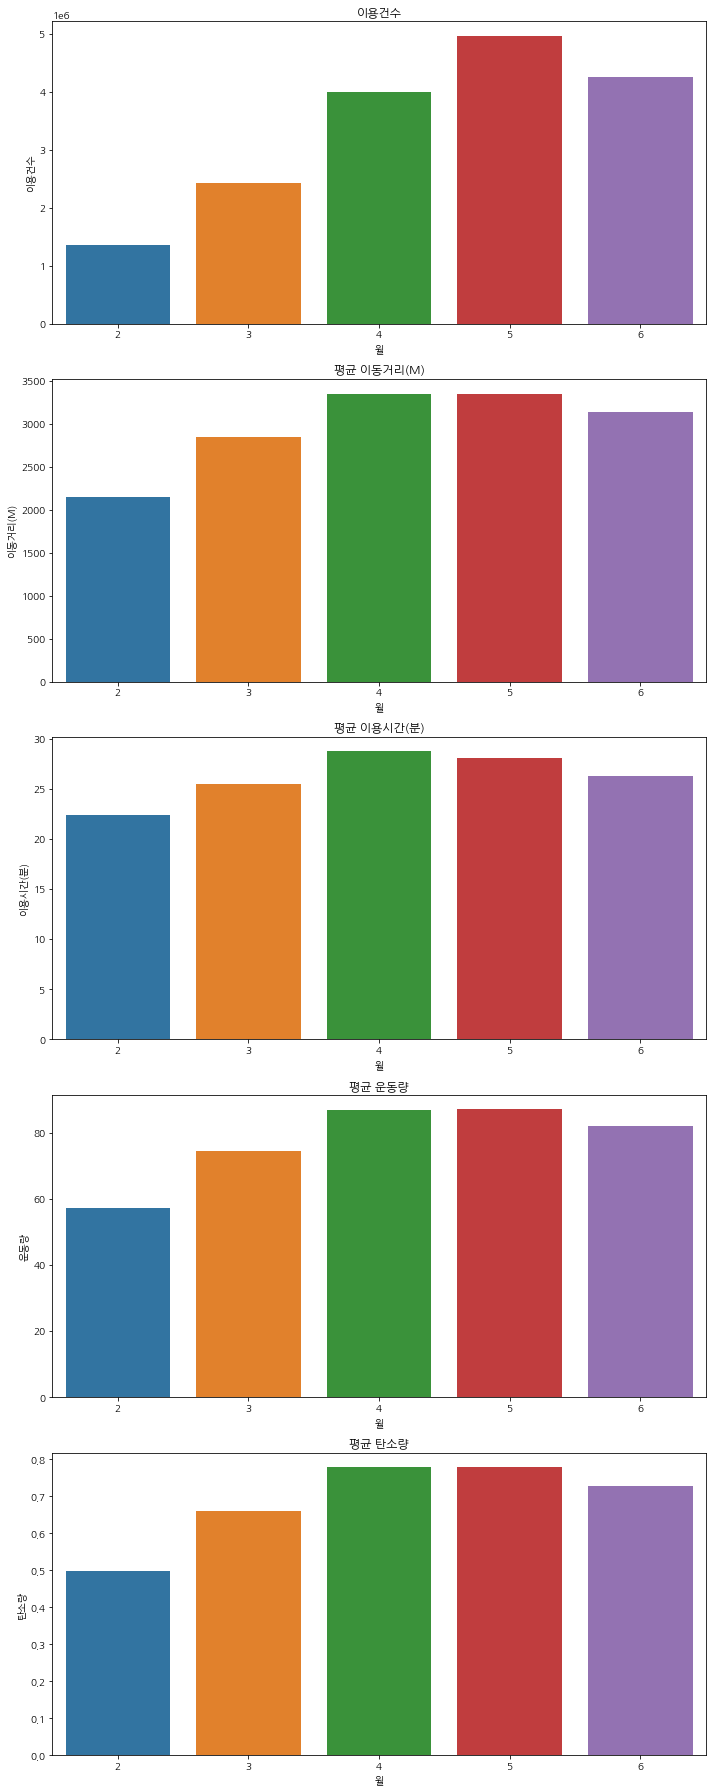

In [19]:
fig,axes = plt.subplots(5,1,figsize=(10,25))
sub_df1 = pd.DataFrame(df.groupby(by=['월'],as_index=False)['이용건수'].sum())
sub_df2 = pd.DataFrame(df.groupby(by=['월'],as_index=False)['이동거리(M)'].mean())
sub_df3 = pd.DataFrame(df.groupby(by=['월'],as_index=False)['이용시간(분)'].mean())
sub_df4 = pd.DataFrame(df.groupby(by=['월'],as_index=False)['운동량'].mean())
sub_df5 = pd.DataFrame(df.groupby(by=['월'],as_index=False)['탄소량'].mean())
sns.barplot(data = sub_df1,x='월',y='이용건수',ax=axes[0]).set(title='이용건수')
sns.barplot(data = sub_df2,x='월',y='이동거리(M)',ax=axes[1]).set(title='평균 이동거리(M)')
sns.barplot(data = sub_df3,x='월',y='이용시간(분)',ax=axes[2]).set(title='평균 이용시간(분)')
sns.barplot(data = sub_df4,x='월',y='운동량',ax=axes[3]).set(title='평균 운동량')
sns.barplot(data = sub_df5,x='월',y='탄소량',ax=axes[4]).set(title='평균 탄소량')
plt.tight_layout()

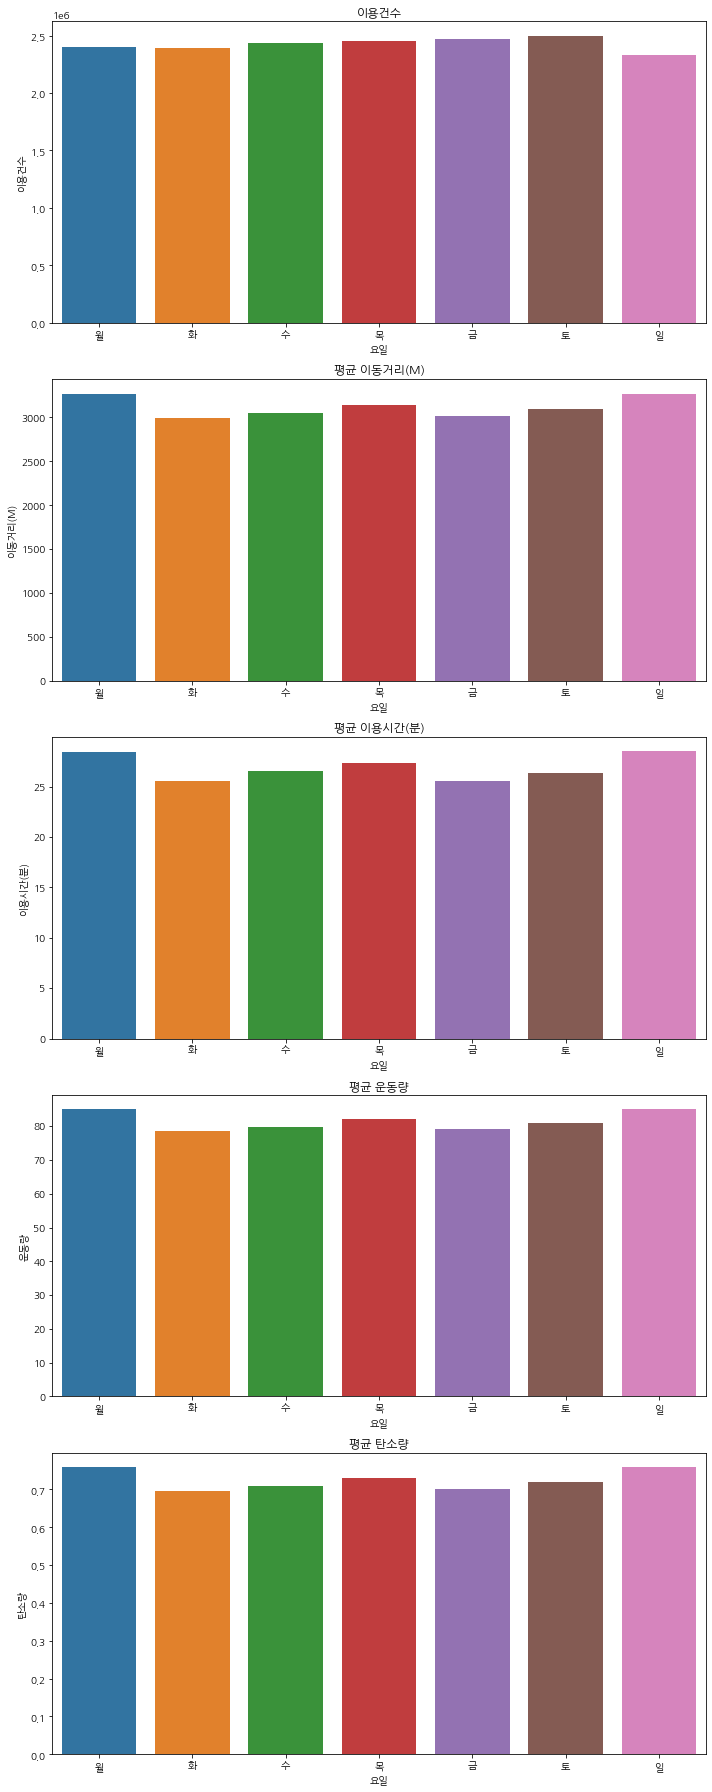

In [20]:
fig,axes = plt.subplots(5,1,figsize=(10,25))
sub_df1 = pd.DataFrame(df.groupby(by=['요일'],as_index=False)['이용건수'].sum())
sub_df2 = pd.DataFrame(df.groupby(by=['요일'],as_index=False)['이동거리(M)'].mean())
sub_df3 = pd.DataFrame(df.groupby(by=['요일'],as_index=False)['이용시간(분)'].mean())
sub_df4 = pd.DataFrame(df.groupby(by=['요일'],as_index=False)['운동량'].mean())
sub_df5 = pd.DataFrame(df.groupby(by=['요일'],as_index=False)['탄소량'].mean())
sns.barplot(data = sub_df1,x='요일',y='이용건수',ax=axes[0],order=weekday).set(title='이용건수')
sns.barplot(data = sub_df2,x='요일',y='이동거리(M)',ax=axes[1],order=weekday).set(title='평균 이동거리(M)')
sns.barplot(data = sub_df3,x='요일',y='이용시간(분)',ax=axes[2],order=weekday).set(title='평균 이용시간(분)')
sns.barplot(data = sub_df4,x='요일',y='운동량',ax=axes[3],order=weekday).set(title='평균 운동량')
sns.barplot(data = sub_df5,x='요일',y='탄소량',ax=axes[4],order=weekday).set(title='평균 탄소량')
plt.tight_layout()

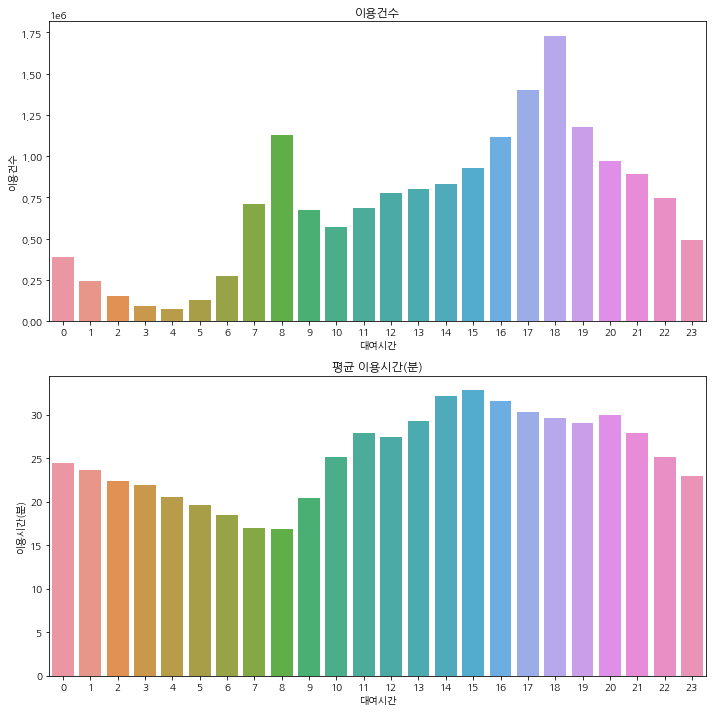

In [88]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
sub_df1 = pd.DataFrame(df.groupby(by=['대여시간'],as_index=False)['이용건수'].sum())
sub_df2 = pd.DataFrame(df.groupby(by=['대여시간'],as_index=False)['이용시간(분)'].mean())
sns.barplot(data = sub_df1,x='대여시간',y='이용건수',ax=axes[0]).set(title='이용건수')
sns.barplot(data = sub_df2,x='대여시간',y='이용시간(분)',ax=axes[1]).set(title='평균 이용시간(분)')
plt.tight_layout()


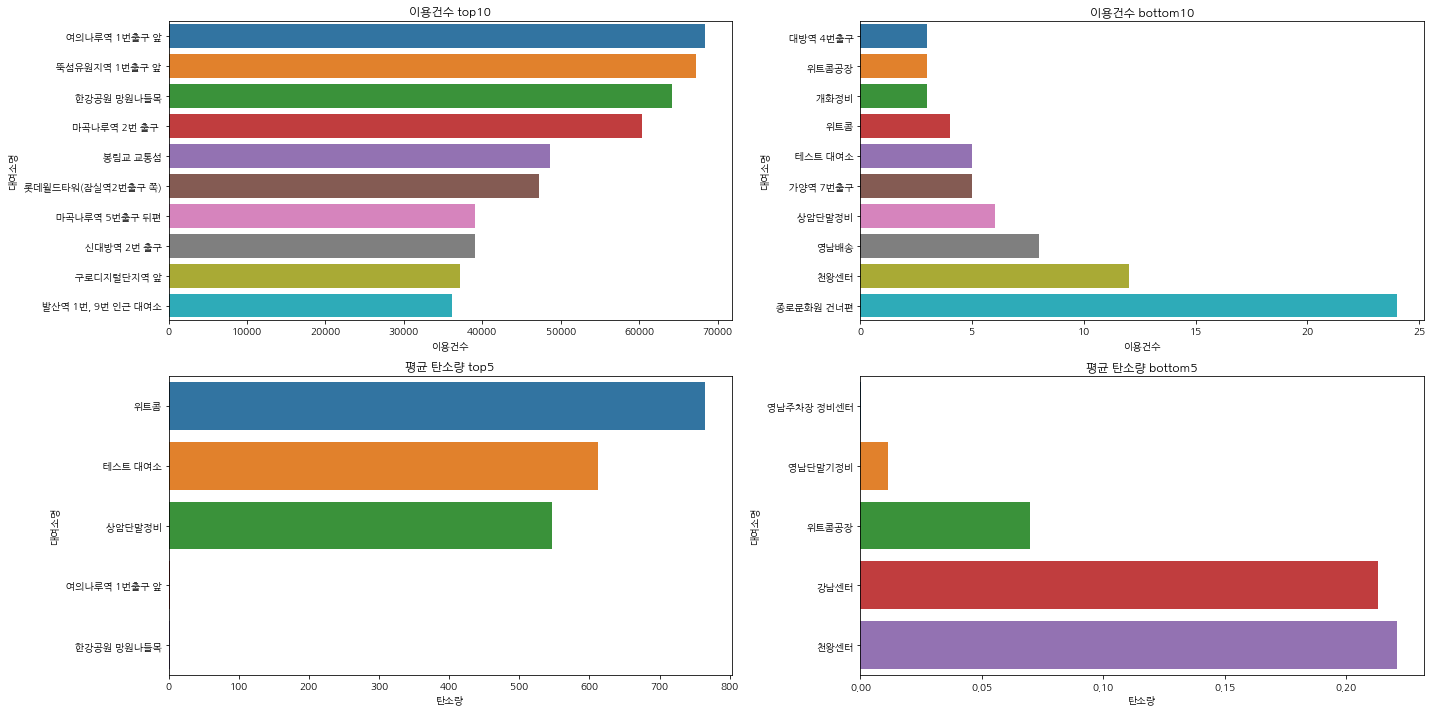

In [104]:
fig,axes = plt.subplots(2,2,figsize=(20,10))

sub_df1 = pd.DataFrame(df.groupby(by=['대여소명'],as_index=False)['이용건수'].sum())
sub_df2 = pd.DataFrame(df.groupby(by=['대여소명'],as_index=False)['탄소량'].mean())

sns.barplot(data = sub_df1.sort_values('이용건수', ascending=False).head(10), x='이용건수',y='대여소명', ax=axes[0][0]).set(title='이용건수 top10')
sns.barplot(data = sub_df1.sort_values('이용건수', ascending=True).head(10), x='이용건수',y='대여소명', ax=axes[0][1]).set(title='이용건수 bottom10')
sns.barplot(data = sub_df2.sort_values('탄소량', ascending=False).head(5), x='탄소량',y='대여소명',ax=axes[1][0]).set(title='평균 탄소량 top5')
sns.barplot(data = sub_df2.sort_values('탄소량', ascending=True).head(5), x='탄소량',y='대여소명',ax=axes[1][1]).set(title='평균 탄소량 bottom5')
plt.tight_layout()

<AxesSubplot: ylabel='대여구분코드'>

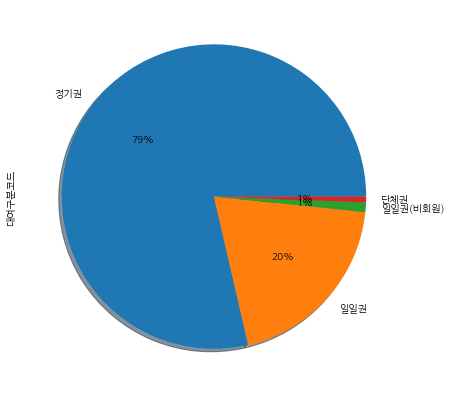

In [44]:
plt.figure(figsize=(7,7))
df['대여구분코드'].value_counts().plot.pie(autopct='%1.0f%%', shadow=True) 

<AxesSubplot: xlabel='연령대코드', ylabel='count'>

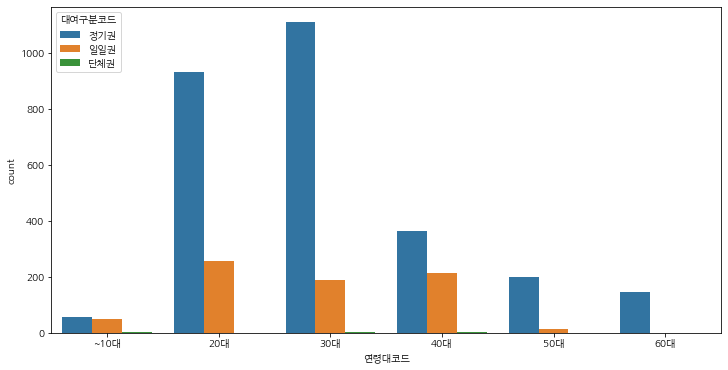

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['성별']!='미상'],x='연령대코드',hue='대여구분코드',order = ['~10대','20대','30대','40대','50대','60대'])

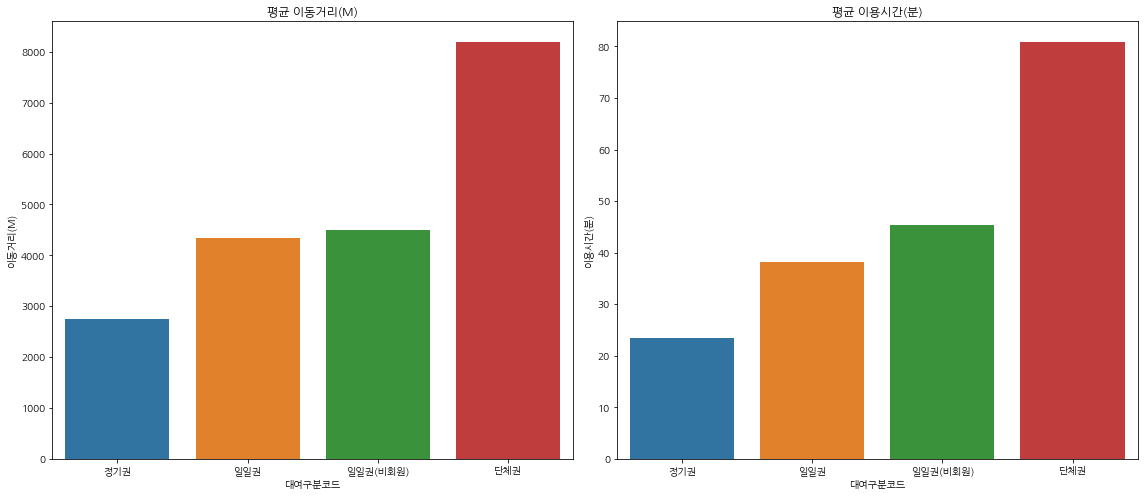

In [100]:
sort_code = ['정기권','일일권','일일권(비회원)','단체권']
fig,axes = plt.subplots(1,2,figsize=(16,7))
sub_df2 = pd.DataFrame(df.groupby(by=['대여구분코드'],as_index=False)['이동거리(M)'].mean())
sub_df3 = pd.DataFrame(df.groupby(by=['대여구분코드'],as_index=False)['이용시간(분)'].mean())
sns.barplot(data = sub_df2,x='대여구분코드',y='이동거리(M)',ax=axes[0],order=sort_code).set(title='평균 이동거리(M)')
sns.barplot(data = sub_df3,x='대여구분코드',y='이용시간(분)',ax=axes[1],order=sort_code).set(title='평균 이용시간(분)')
plt.tight_layout()

<AxesSubplot: ylabel='성별'>

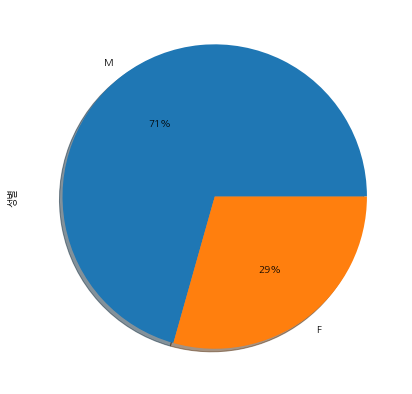

In [55]:
plt.figure(figsize=(7,7))
df[df['성별']!='미상']['성별'].value_counts().plot.pie(autopct='%1.0f%%', shadow=True) 

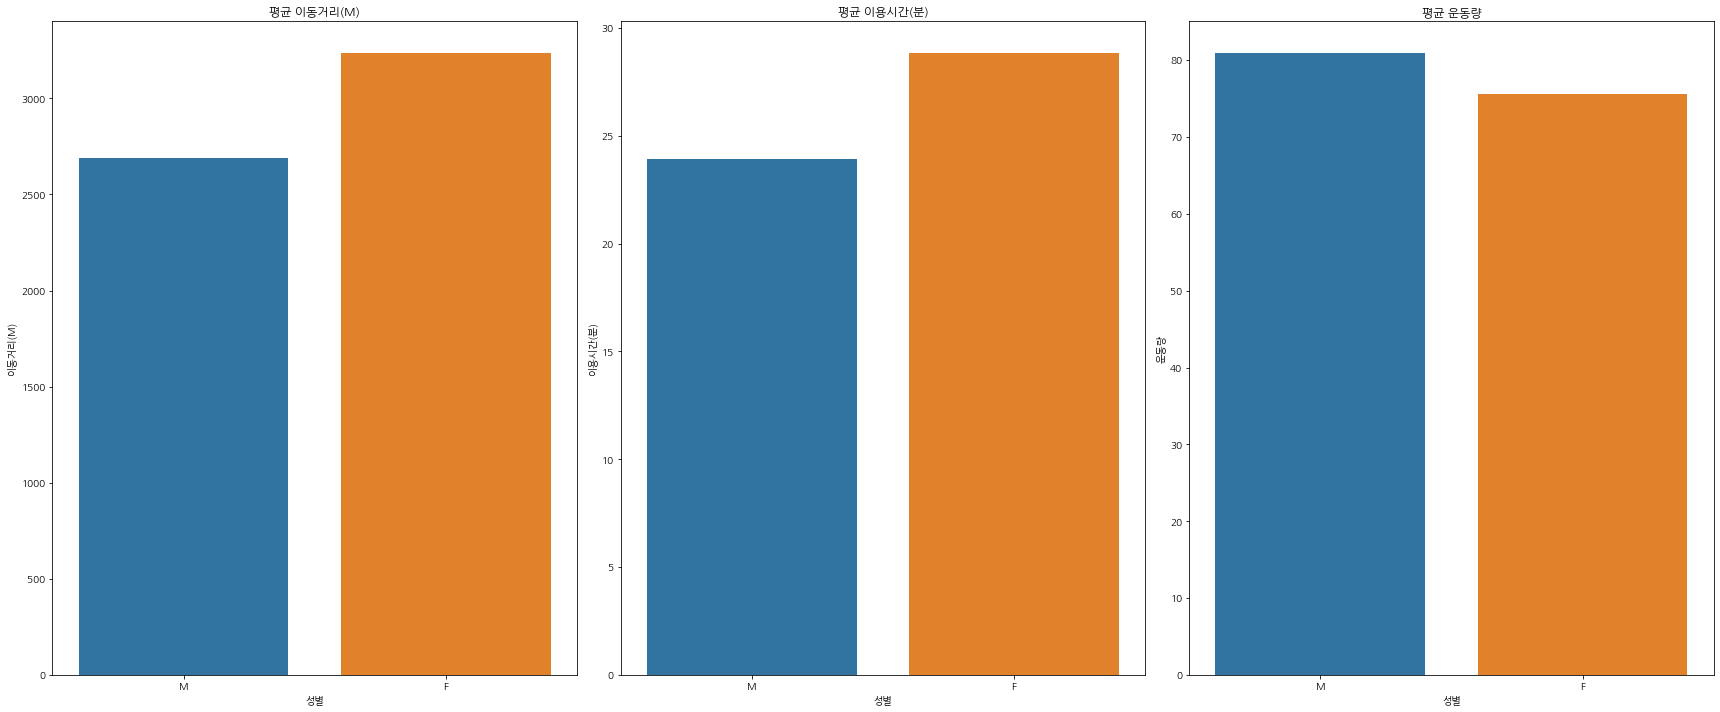

In [21]:
sex_list = ['M','F']

fig,axes = plt.subplots(1,3,figsize=(24,10))
sub_df2 = pd.DataFrame(df[df['성별']!='미상'].groupby(by=['성별'],as_index=False)['이동거리(M)'].mean())
sub_df3 = pd.DataFrame(df[df['성별']!='미상'].groupby(by=['성별'],as_index=False)['이용시간(분)'].mean())
sub_df4 = pd.DataFrame(df[df['성별']!='미상'].groupby(by=['성별'],as_index=False)['운동량'].mean())

sns.barplot(data = sub_df2,x='성별',y='이동거리(M)',ax=axes[0],order=sex_list).set(title='평균 이동거리(M)')
sns.barplot(data = sub_df3,x='성별',y='이용시간(분)',ax=axes[1],order=sex_list).set(title='평균 이용시간(분)')
sns.barplot(data = sub_df4,x='성별',y='운동량',ax=axes[2],order=sex_list).set(title='평균 운동량')
plt.tight_layout()

<AxesSubplot: ylabel='연령대코드'>

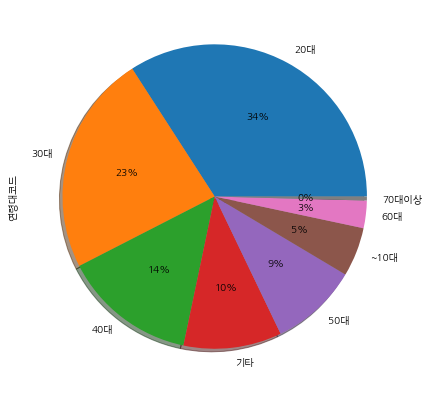

In [94]:
plt.figure(figsize=(7,7))
df['연령대코드'].value_counts().plot.pie(autopct='%1.0f%%', shadow=True) 

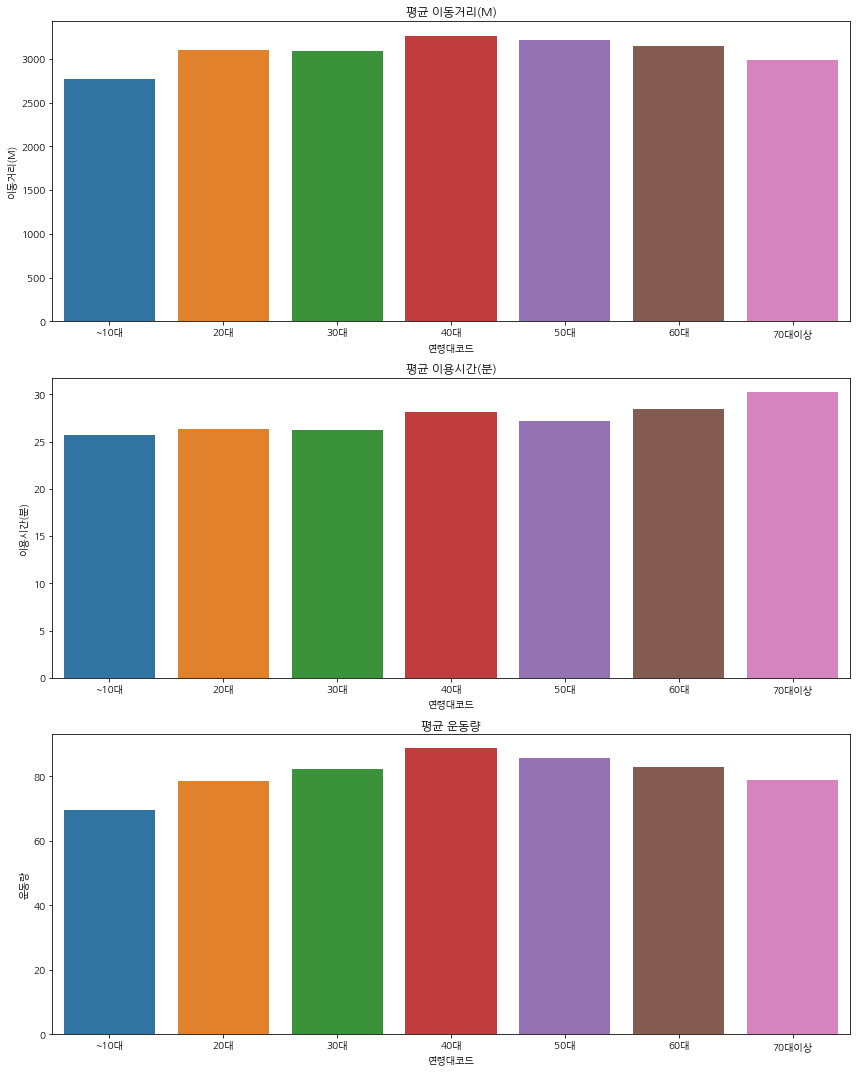

In [23]:
age_code = ['~10대','20대','30대','40대','50대','60대','70대이상']
fig,axes = plt.subplots(3,1,figsize=(12,15))
sub_df2 = pd.DataFrame(df.groupby(by=['연령대코드'],as_index=False)['이동거리(M)'].mean())
sub_df3 = pd.DataFrame(df.groupby(by=['연령대코드'],as_index=False)['이용시간(분)'].mean())
sub_df4 = pd.DataFrame(df.groupby(by=['연령대코드'],as_index=False)['운동량'].mean())


sns.barplot(data = sub_df2,x='연령대코드',y='이동거리(M)',ax=axes[0],order=age_code).set(title='평균 이동거리(M)')
sns.barplot(data = sub_df3,x='연령대코드',y='이용시간(분)',ax=axes[1],order=age_code).set(title='평균 이용시간(분)')
sns.barplot(data = sub_df4,x='연령대코드',y='운동량',ax=axes[2],order=age_code).set(title='평균 운동량')
plt.tight_layout()

## 분석 결과

**월별 이용건수,평균 이동거리,평균 이용시간,평균 운동량,평균 탄소량은 얼마인가?**

- 이용 건수는 1,2월에 적고 4,5,6월에 점차 증가함.

- 이동거리, 이용시간, 탄소량, 운동량은 이용 건수에 어느정도 비례함.


**요일별 이용건수,평균 이동거리,평균 이용시간,평균 운동량,평균 탄소량은 얼마인가?**

- 월요일에 운동량이 두드러지게 높음.

- 나머지 항목은 요일 상관없이 비슷한 경향을 보임


**대여시간별 이용건수,평균 이용시간은 얼마인가?**

- 7-9시, 16-20시에 이용건수가 집중됨.

- 반면 7-9시 평균 이용시간은 짧고, 16-20시 평균 이용시간은 길게 나타남.


**가장 많이/적게 이용하는 대여소 top10?**

- 역세권 부근에서 이용건수가 많이 나타남

**가장 많이/적게 탄소를 절감하는 대여소 top5?**

- 탄소량은 3군데에서만 탄소량이 두드러지게 높고 나머지는 큰차이가 없음.

**이용건수, 연령대별 대여구분코드, 평균 이동거리, 평균 이용시간은 얼마인가?**

- 정기권 80프로, 일일권 20프로, 단체권은 극소수

- 10대,40대는 일일권 비율이 높은 비중을 차지하지만 나머지 연령대는 대부분 정기권 비율이 훨씬 높음

- 정기권의 평균 이동거리,이용시간이 가장 낮고, 단체권이 가장 높음

**성별 이용건수, 평균 이동거리, 평균 이용시간, 평균 운동량은 얼마인가?**

- 7:3의 성비

- 평균 이동거리, 이용시간은 여성이 높지만 운동량은 남성이 높음

**연령대별 이용건수, 평균 이동거리, 평균 이용시간, 평균 운동량은 얼마인가?**

- 연령대의 경우 20대,30대,40대 순으로 높음

- 평균 이동거리,이용시간,운동량은 비슷함.


## 분석 결과에 대한 추측

- 월마다 이용시간의 차이를 보이는 것은 날씨의 영향때문일 것이다.

- 오전에 이용건수가 많고 이용시간이 짧은 것은 출퇴근 인구의 영향으로 보인다.

- 오후-저녁에 이용건수와 이용시간이 많은 것은 여가 활동으로 여유롭게 즐기기 
때문으로 보인다.

- 역세권 부근에서 이용건수가 많은 이유는 접근성이 좋기 때문으로 판단된다.

- 탄소절감량이 3군데에 집중되는 이유는 장소의 특수성이 있는 것으로 보이나, 정확한 이유는 판단하기 어렵다.

- 10대의 경우 금전적으로 여유롭지 못하기 때문에 일일권의 비율이 특히 높은 것으로 보이고, 나머지 연령대는 좀 더 다양한 요인들이 영향을 끼치는 것 같다.

- 평균 이용 시간은 여성이 높지만 이용 시간 대비 운동량은 남성이 높은 이유는 남성이 운동을 목적으로 하는 경향이 강하기 때문으로 판단된다.